In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.linear_model import LogisticRegression

/home/aa5264/Desktop/CL-Mammoth/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def feature_subplots(task_feature_paths, subtitles, plot_filename="", drifted_task=None):
    assert len(task_feature_paths) == len(
        subtitles
    ), "# of files and plot subtitles must match."

    fig, axes = plt.subplots(1, len(task_feature_paths), figsize=(16, 4))
    boundary_color = "black"

    for i, ax in enumerate(axes):
        data = torch.load(task_feature_paths[i])
        features = data["features"].numpy()
        labels = data["labels"].numpy()

        reducer = umap.UMAP(n_components=2)
        reduced_features = reducer.fit_transform(features)

        clf = LogisticRegression()
        clf.fit(reduced_features, labels)

        x_min, x_max = reduced_features[:, 0].min() - 1, reduced_features[:, 0].max() + 1
        y_min, y_max = reduced_features[:, 1].min() - 1, reduced_features[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        sns.scatterplot(
            x=reduced_features[:, 0],
            y=reduced_features[:, 1],
            hue=labels,
            palette="tab10",
            alpha=0.7,
            ax=ax,
        )

        if drifted_task is not None and (i + 1) >= drifted_task:
            boundary_color = "red"
        ax.contour(xx, yy, Z, levels=[0.5], colors=boundary_color, linewidths=1)
        ax.grid(True, linewidth=0.3)
        ax.set_title(subtitles[i], fontsize=14)
        ax.legend(title="Classes", prop={"size": 6})
        ax.set_xticks(list(range(-5, 16, 5)))
        ax.set_yticks(list(range(0, 14, 2)))

    fig.supxlabel("Reduced Feature Dimension 1", fontsize=14)
    fig.supylabel("Reduced Feature Dimension 2", fontsize=14)
    plt.tight_layout()
    if plot_filename != "" and len(plot_filename) > 0:
        plt.savefig(plot_filename, format="pdf", dpi=300)
    plt.show()

# No Drift

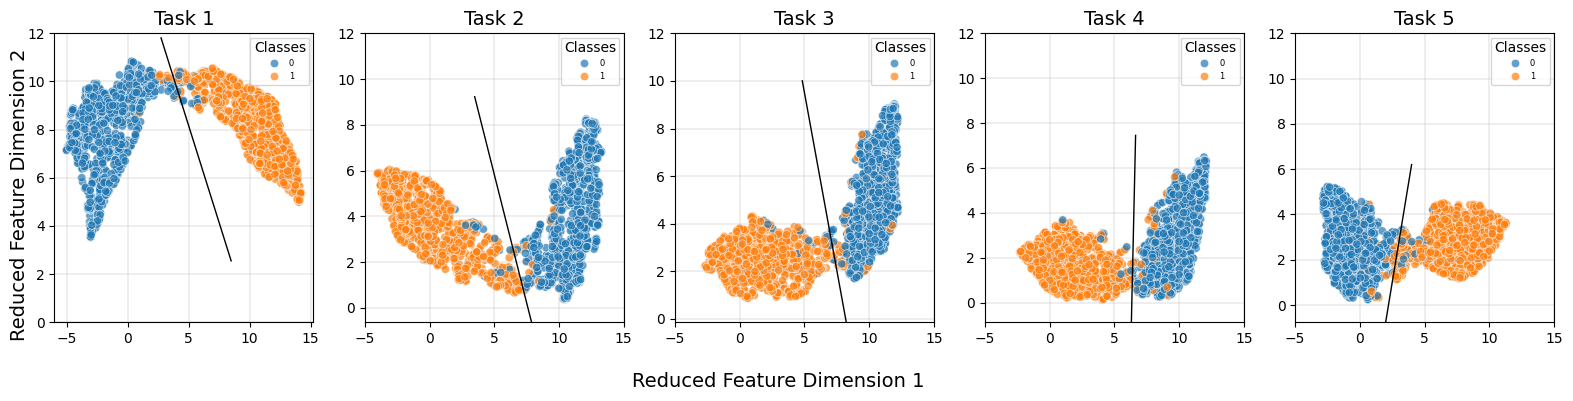

In [ ]:
file_paths = [
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-6-n-1-T-1.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-6-n-1-T-2.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-6-n-1-T-3.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-6-n-1-T-4.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-6-n-1-T-5.pth",
]

subtitles = ["Task 1", "Task 2", "Task 3", "Task 4", "Task 5"]

feature_subplots(file_paths, subtitles, plot_filename="CIFAR10_Buff_5000_n_1_feature_shift_n_0.pdf")

# Drift in Task 3

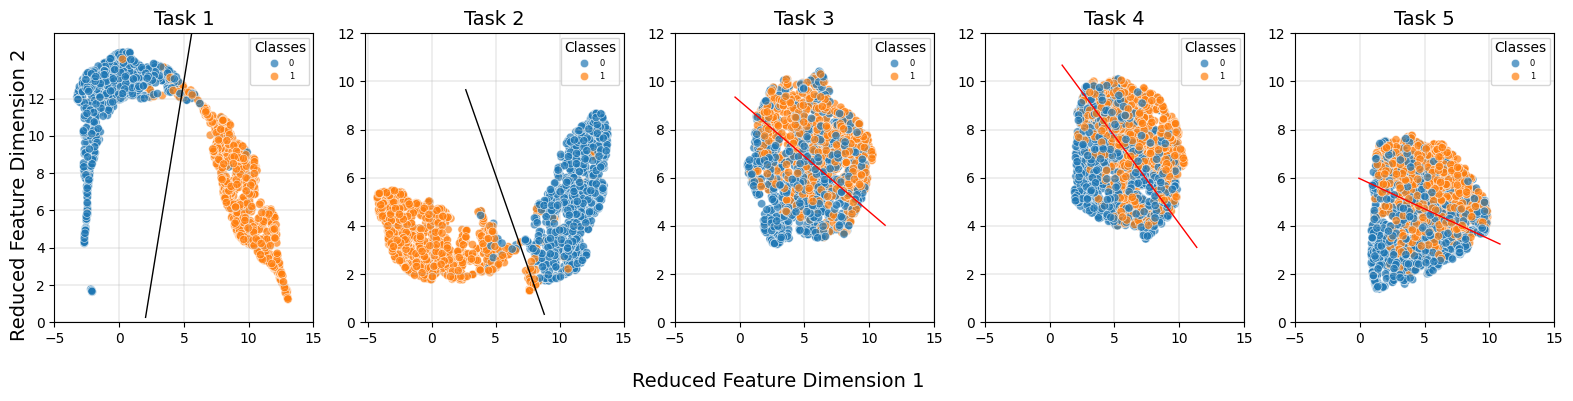

In [4]:
file_paths = [
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-5-n-1-T-1.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-5-n-1-T-2.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-5-n-1-T-3.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-5-n-1-T-4.pth",
    "../results/Concept-Drift/Feature-Shift/features-cifar10-cd-5-n-1-T-5.pth",
]

subtitles = ["Task 1", "Task 2", "Task 3", "Task 4", "Task 5"]

feature_subplots(file_paths, subtitles, plot_filename="CIFAR10_Buff_5000_n_1_feature_shift_n_1.pdf", drifted_task=3)